In [24]:
import pandas as pd, numpy as np, string as st

from sklearn.datasets import make_blobs

In [69]:

def create_dataset(size, n_feat):
    blobs, quality = make_blobs(n_samples=size, n_features=n_feat)
    df = pd.concat([pd.DataFrame(blobs, index = range(size), columns= ['Availability', 'Responding time', 'Security', 'Energy Cons'])
,pd.DataFrame(quality,index = range(size), columns=['Quality'])],axis = 1)
    return df
    



In [84]:
data = create_dataset(1000,4)

In [85]:
data = data.apply(abs)

In [86]:
data['Security'] *= 10

In [87]:
data[data['Responding time'] ==  data["Responding time"].min()]

,Availability,Responding time,Security,Energy Cons,Quality
8,6.160909,0.017413,68.469722,5.193455,1


In [88]:
import matplotlib.pyplot as plt, seaborn as sns

In [89]:
%matplotlib inline

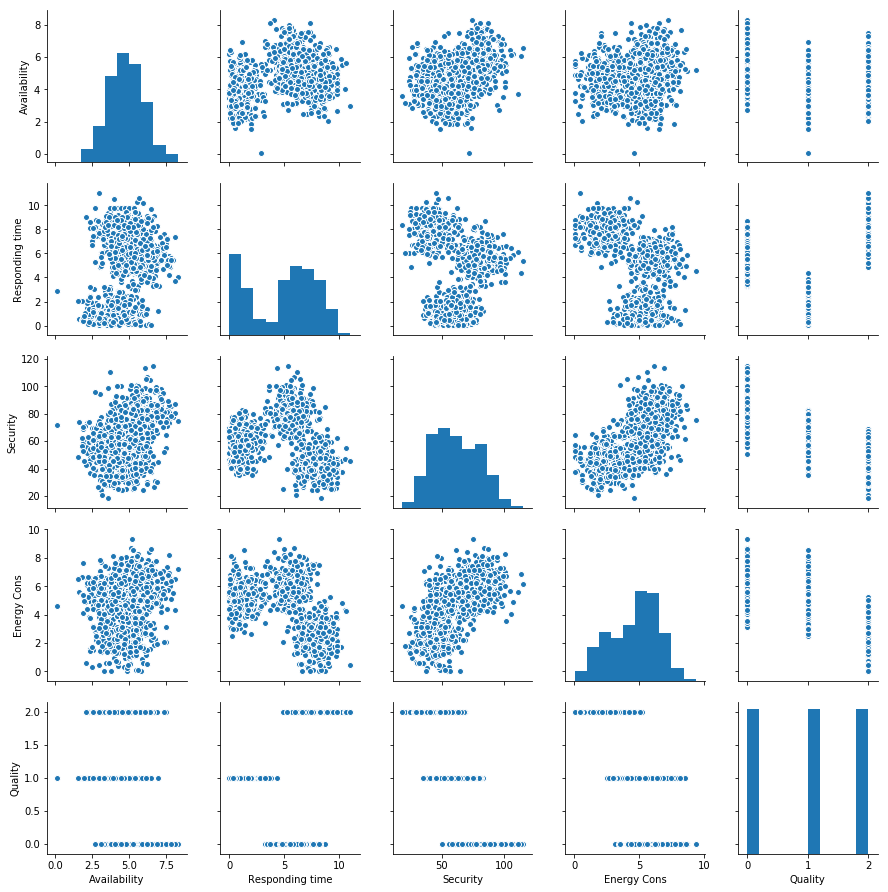

In [95]:
sns.pairplot(data,)

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X = data.drop('Quality', axis=1)
y = data['Quality']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=1)

In [108]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [102]:
prediction  = knn.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99       105
          1       0.99      1.00      1.00       105
          2       1.00      0.98      0.99        90

avg / total       0.99      0.99      0.99       300



In [111]:
print(confusion_matrix(y_test, prediction))

[[104   1   0]
 [  0 105   0]
 [  2   0  88]]


In [117]:
error = []
for i in range(50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


ValueError: Expected n_neighbors > 0. Got 0